In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel(r'EastWestAirlines.xlsx', sheet_name='data')

In [3]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# Column rename.

dataset= dataset.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [5]:
# not going to falloe EDA step here since it is already done in link1.(Above cell)
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  dataset.drop(['ID','Award'], axis=1)
dataset1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [6]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(3999, 10)

In [7]:
#MinMaxScalar
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3999, 10)

In [8]:
#Running PCA of standardized data.
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [9]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [10]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [11]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

In [12]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [13]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [14]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


model1


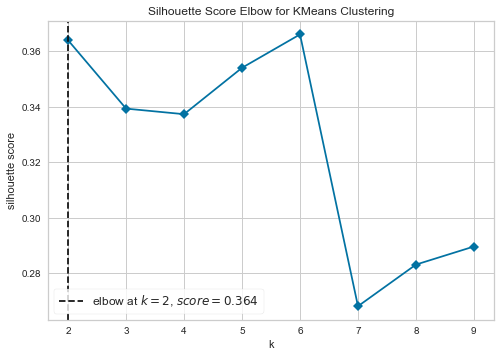

model2


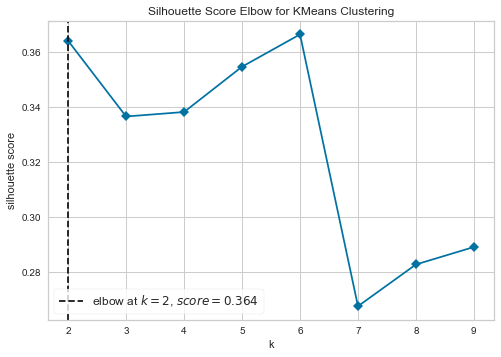

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have your data stored in a variable called 'pca_std_df'
data = pca_std_df

# Instantiate a scikit-learn K-Means model. We will check for two different hyperparameter values.
model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2, 10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2, 10), metric='silhouette', timings=False)

# Fit the data and visualize
print('model1')
visualizer1.fit(data)
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(data)
visualizer2.poof()
plt.show()


In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in a variable called 'pca_std_df'
data = pca_std_df

list1 = [2, 3, 4, 5, 6, 7, 8, 9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(data)
    sil_score1 = silhouette_score(data, cluster_labels1)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", sil_score1)


For n_clusters = 2 The average silhouette_score is: 0.3639788167896175
For n_clusters = 3 The average silhouette_score is: 0.3393430103388891
For n_clusters = 4 The average silhouette_score is: 0.337334735838181
For n_clusters = 5 The average silhouette_score is: 0.3540647225479193
For n_clusters = 6 The average silhouette_score is: 0.3661003712682498
For n_clusters = 7 The average silhouette_score is: 0.26810128168771685
For n_clusters = 8 The average silhouette_score is: 0.28310928094594906
For n_clusters = 9 The average silhouette_score is: 0.28962928309788544


model3


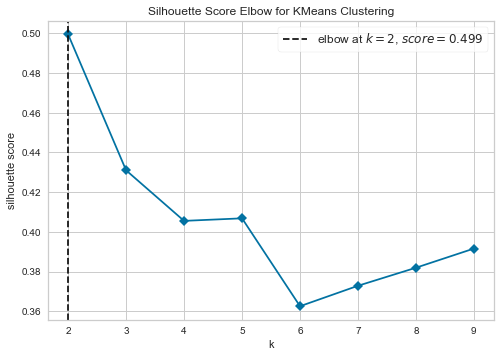

model4


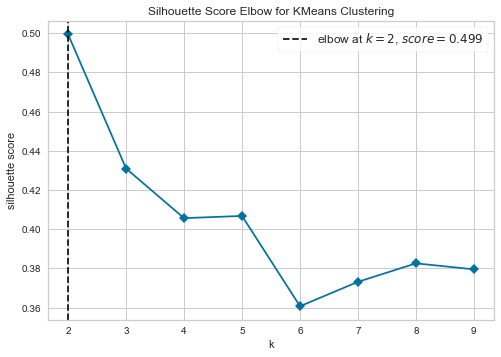

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have your data stored in a variable called 'pca_minmax_df'
data = pca_minmax_df

# Instantiate a scikit-learn K-Means model. We will check for two different hyperparameter values.
model3 = KMeans(random_state=0)
model4 = KMeans(random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2, 10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2, 10), metric='silhouette', timings=False)

# Fit the data and visualize
print('model3')
visualizer3.fit(data)
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(data)
visualizer4.poof()
plt.show()


In [26]:
#method2:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in a variable called 'pca_minmax_df'
data = pca_minmax_df

list1 = [2, 3, 4, 5, 6, 7, 8, 9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer2.fit_predict(data)
    sil_score2 = silhouette_score(data, cluster_labels2)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", sil_score2)

    

For n_clusters = 2 The average silhouette_score is: 0.49943893930982836
For n_clusters = 3 The average silhouette_score is: 0.4309805531772463
For n_clusters = 4 The average silhouette_score is: 0.40550991257208807
For n_clusters = 5 The average silhouette_score is: 0.4067926562667399
For n_clusters = 6 The average silhouette_score is: 0.36251891463783775
For n_clusters = 7 The average silhouette_score is: 0.372819422749779
For n_clusters = 8 The average silhouette_score is: 0.38190983890773805
For n_clusters = 9 The average silhouette_score is: 0.39156485921088796


In [29]:
from sklearn.cluster import KMeans

# Run K-Means:
# We have found a good number of clusters = 6
# Model building using cluster numbers = 6
model1 = KMeans(n_clusters=6, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape


(3999,)

In [30]:
# these are nothing but cluster labels...

y_predict1

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[-1.04566981e+00,  2.62893297e-01, -1.69236338e-02,
        -8.59157738e-02, -5.22349728e-02,  1.43189598e-01,
         5.52394408e-02,  1.38895703e-03],
       [ 1.39019974e+00, -1.00482408e+00, -7.60909828e-02,
         9.41955488e-02, -2.55784255e-01, -2.51248701e-01,
        -6.86126999e-02, -1.83908027e-02],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01],
       [ 4.22422340e+00,  4.07622197e+00,  1.37463788e-01,
        -2.04191722e-01, -6.13873290e-01,  5.13427680e-01,
        -4.97945201e-02,  1.19765871e-01],
       [ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02]])

In [33]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

16718.29936240569

In [34]:
model1.score(pca_std_df) 

# it is opposite value of sum of squared value..avoid to use it. It is bit confusing

-16718.299362405687

In [35]:
# this will give what hyper parameter is used in model.


model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

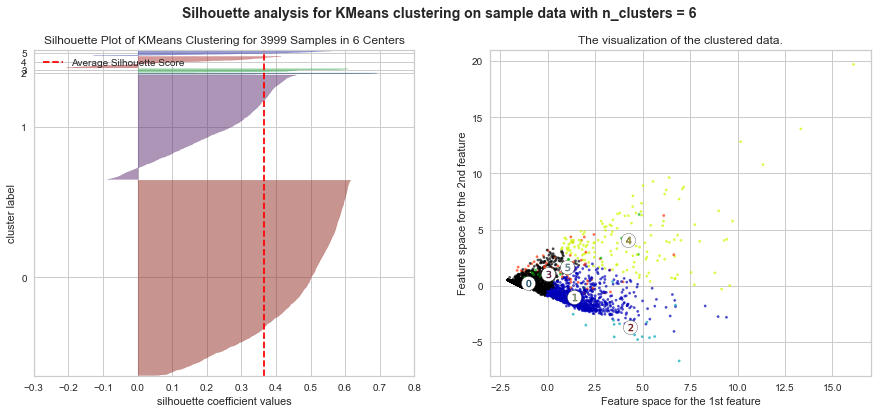

In [36]:
#visualizing silhoutte score..for different cluster
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)
# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
    ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [37]:
#Putting Cluster lables into original dataset And analysis of the same.
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [38]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([dataset.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


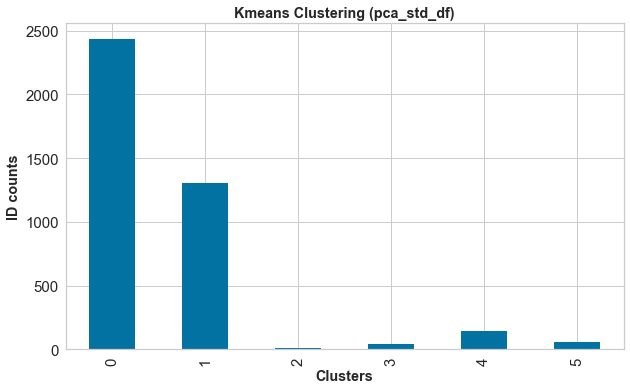

In [39]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

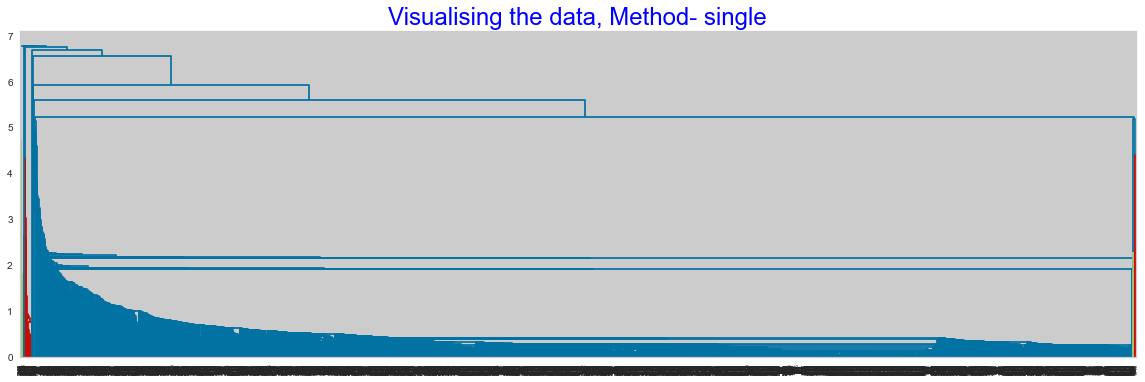

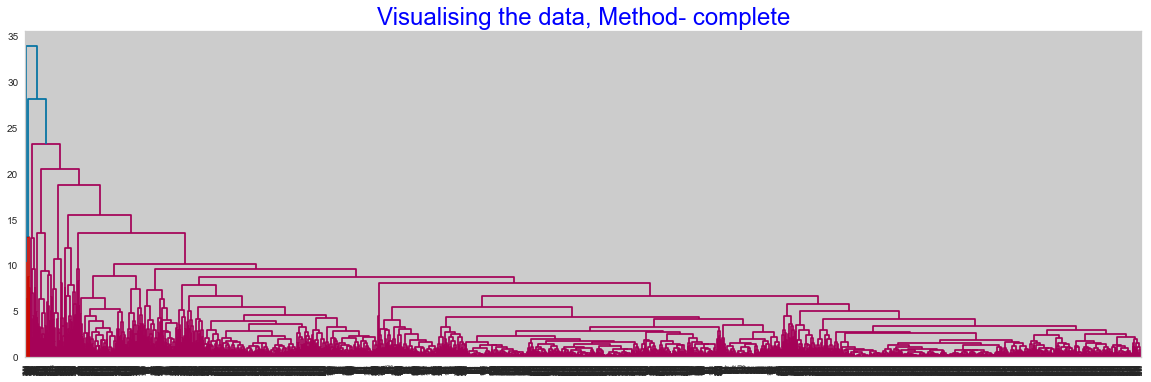

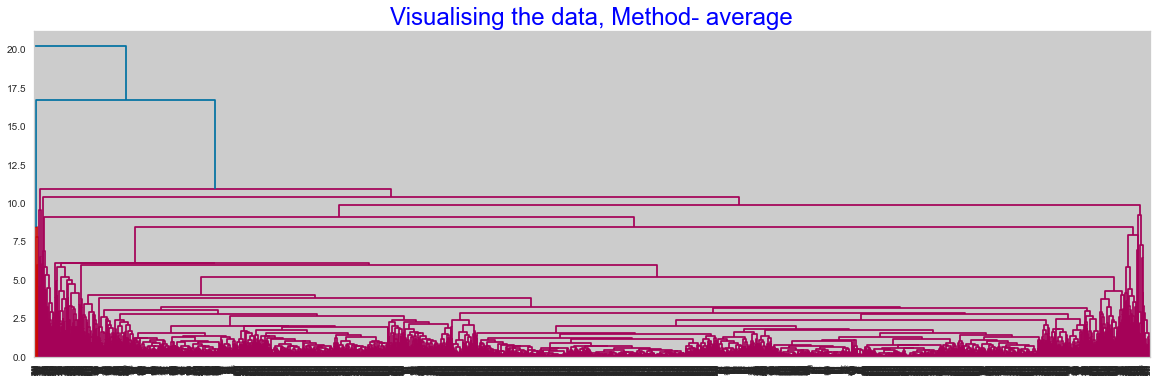

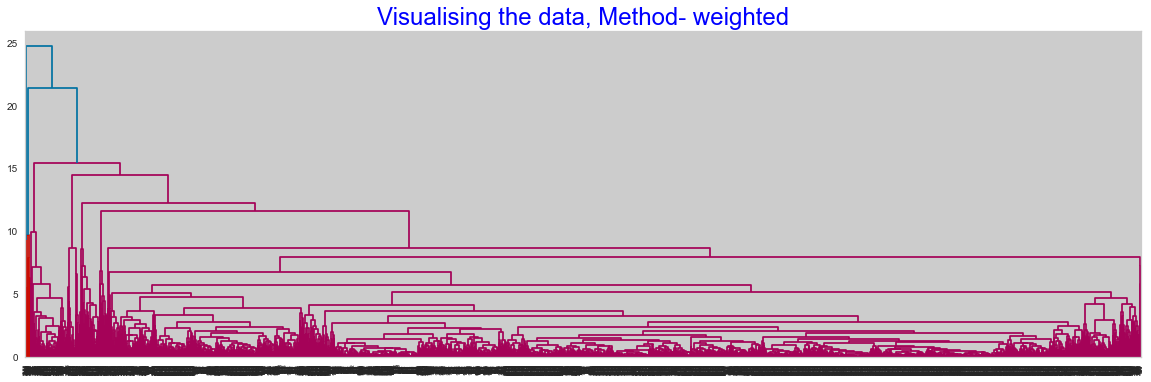

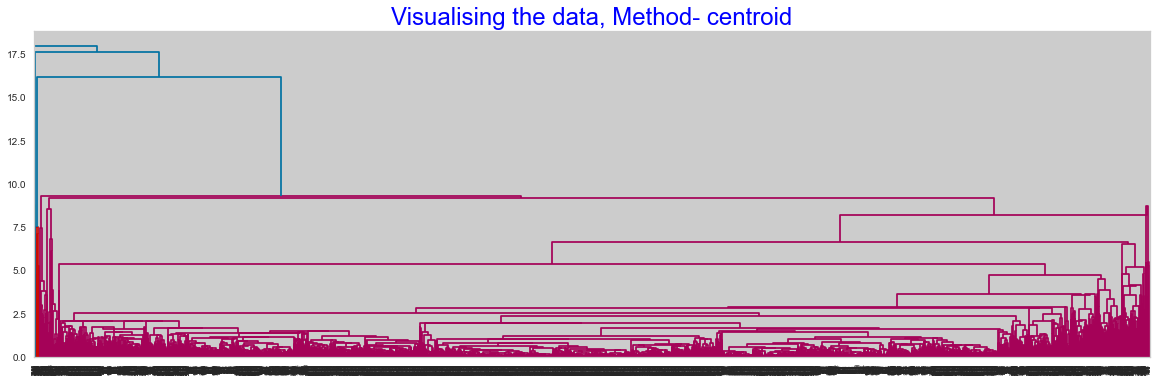

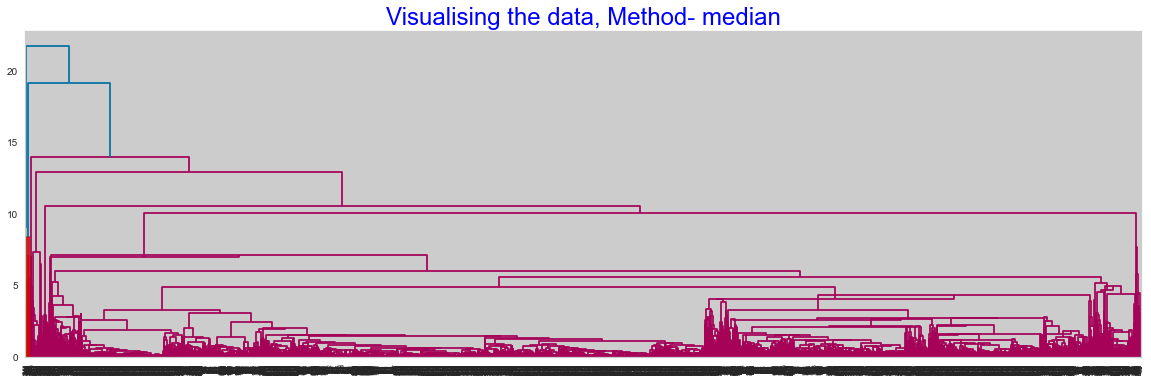

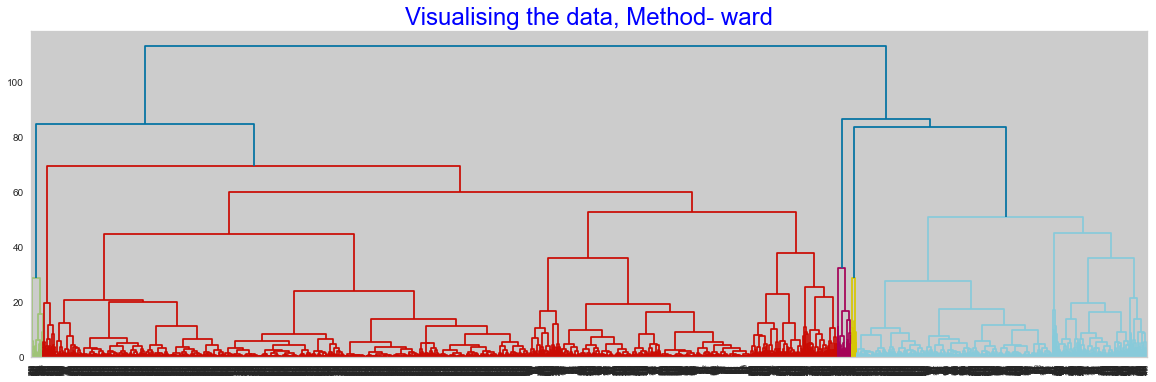

In [41]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

for methods in ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']:
    plt.figure(figsize=(20, 6))
    dict = {'fontsize': 24, 'fontweight': 16, 'color': 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods), fontdict=dict)
    Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_df, method=methods, optimal_ordering=False))

# Note: the execution of this cell takes time so I have attached output graphs below


In [42]:
#Method 2: Silhouette Score method.
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.3139605594950567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8258402005485834
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8258402005485834
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7595573832017466

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3099513555846735
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7965798717740988
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7965798717740988
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7592925058168967

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3282481973781311
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6569044547102614
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6940154925011897
For n

In [43]:
#Run Hierarchical Clustering.(Agglomerative Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [45]:
# cluster labels for each point

agg_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
# Number of leaves in the hierarchical tree.

agg_clustering.n_leaves_

3999

In [47]:
# The estimated number of connected components in the graph.

agg_clustering.n_connected_components_

1

In [48]:
# The children of each non-leaf node. Values less than n_samples correspond to leaves of 
#......the tree which are the original samples. A node i greater than or equal to n_samples 
#.........is a non-leaf node and has children children_[i - n_samples]. Alternatively at the 
#...........i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i

agg_clustering.children_

array([[3370, 3876],
       [1826, 2121],
       [2678, 2679],
       ...,
       [7991, 7993],
       [7986, 7994],
       [7988, 7995]])

In [49]:
# Clustering Score

(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

66.804

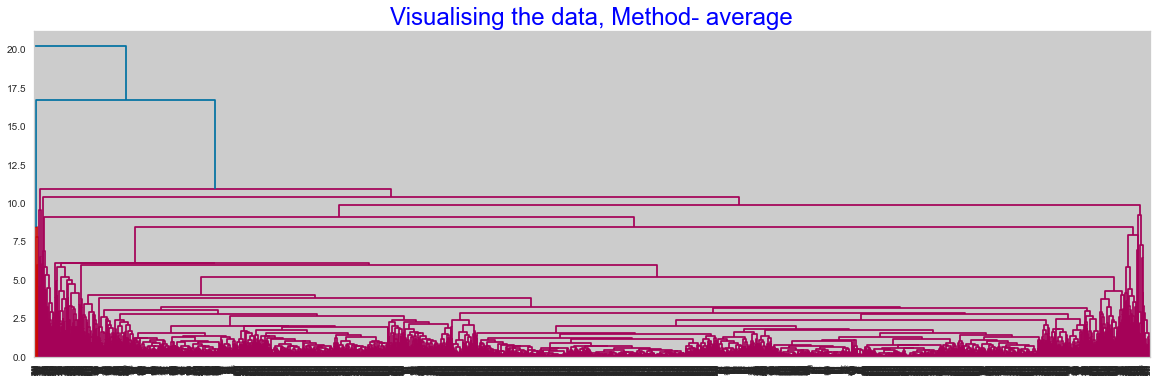

In [50]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [51]:
#Putting Cluster lables into original dataset And analysis of the same.
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [52]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([dataset.copy(), hie_cluster], axis=1)
hie_df .head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


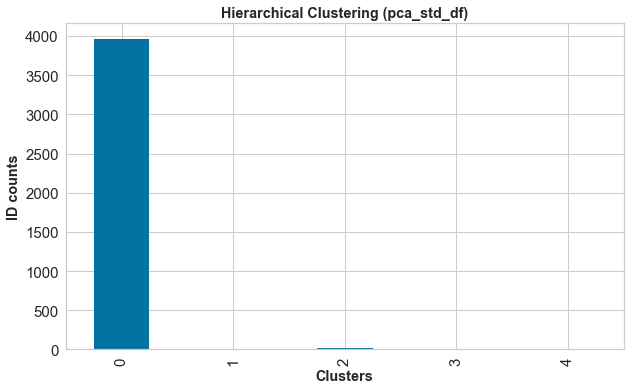

In [53]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [54]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436
1,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
2,15,15,15,15,15,15,15,15,15,15,15,15
3,43,43,43,43,43,43,43,43,43,43,43,43
4,143,143,143,143,143,143,143,143,143,143,143,143
5,59,59,59,59,59,59,59,59,59,59,59,59


In [55]:
#Cluster Anlysis for Future Decision (Kmeans clustering)
# Groupby Cluster lables

count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436
1,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
2,15,15,15,15,15,15,15,15,15,15,15,15
3,43,43,43,43,43,43,43,43,43,43,43,43
4,143,143,143,143,143,143,143,143,143,143,143,143
5,59,59,59,59,59,59,59,59,59,59,59,59


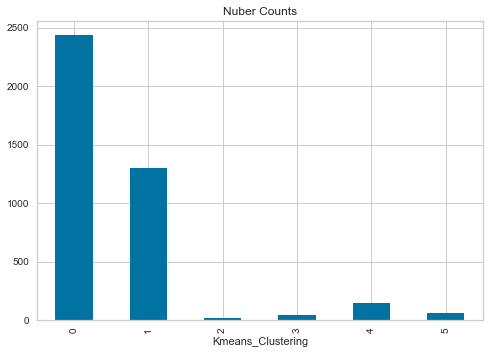

In [56]:
# Total numbers in each cluster..

count = count_df.xs('ID' ,axis = 1)
count.plot(kind='bar', title= 'Nuber Counts')
plt.show()

In [57]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster5_avg'])

In [58]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg,Cluster4_avg,Cluster5_avg
ID,2233.239737,1629.828089,1664.866667,2269.372093,1722.755245
Balance,42323.746305,116923.904068,138061.400000,68876.581395,188282.216783
Qual_miles,49.486864,50.556408,78.800000,23.255814,464.573427
cc1_miles,1.183498,3.692249,3.466667,1.139535,2.244755
cc2_miles,1.000000,1.000000,1.000000,2.348837,1.000000
cc3_miles,1.000411,1.001535,4.066667,1.000000,1.000000
Bonus_miles,4244.377668,38642.166539,93927.866667,14689.837209,32916.748252
Bonus_trans,6.560345,18.808903,28.066667,17.534884,28.013986
Flight_miles_12mo,209.229885,324.110514,506.666667,582.627907,5721.174825
Flight_trans_12,0.639573,0.973906,1.600000,2.209302,16.622378


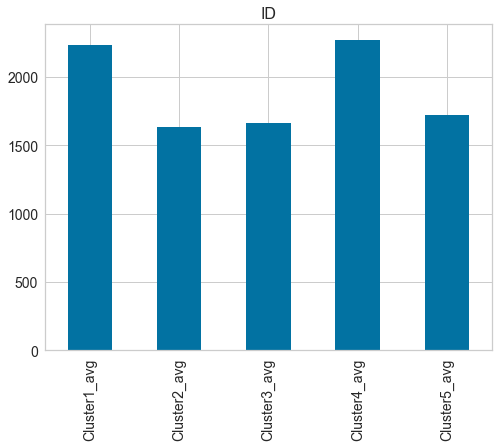

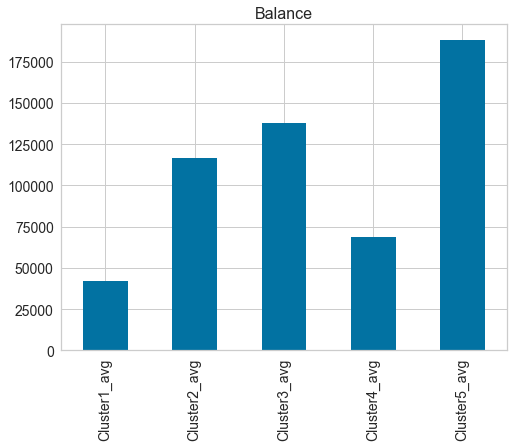

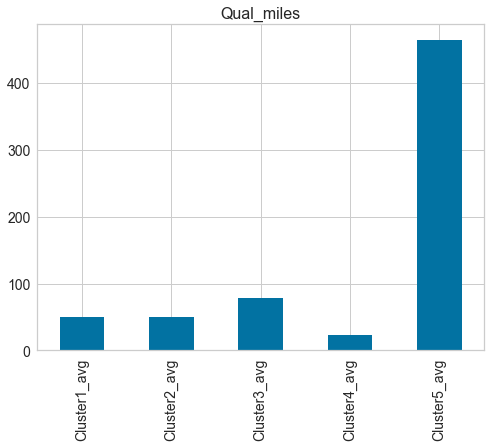

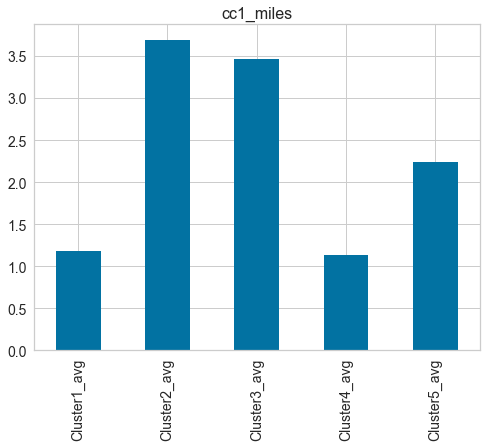

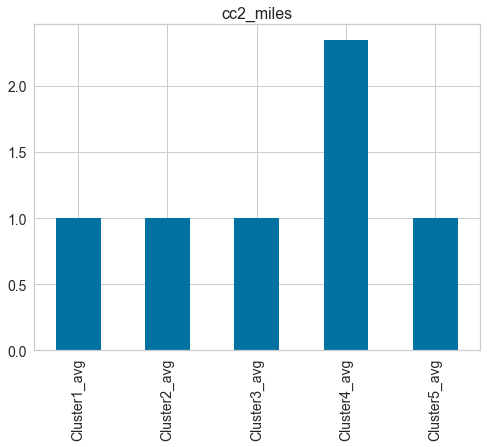

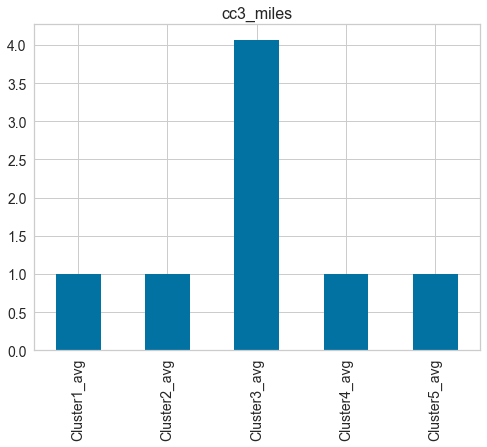

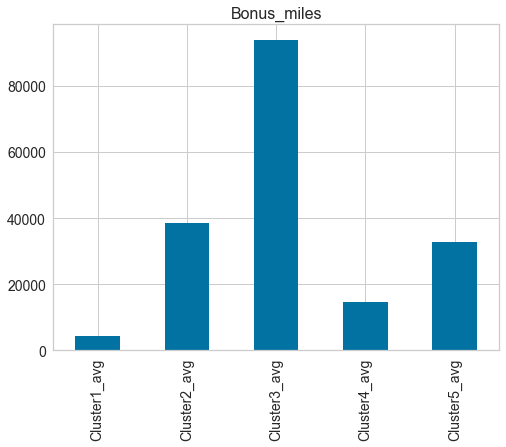

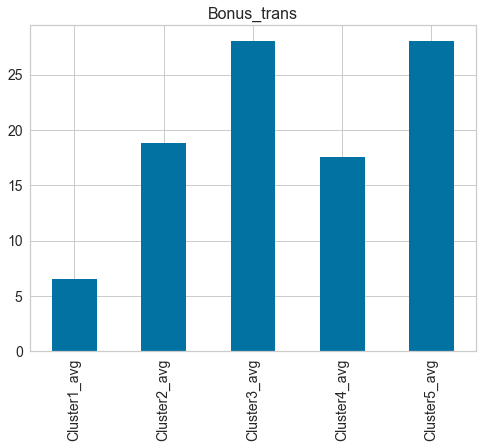

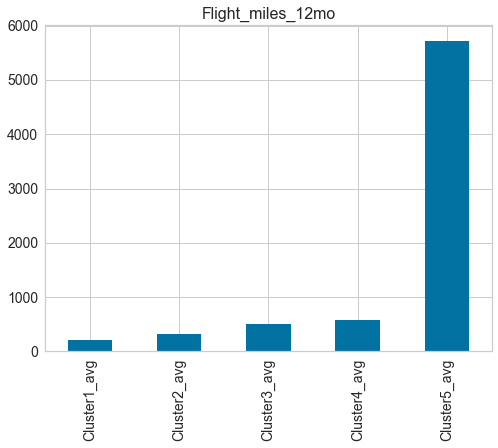

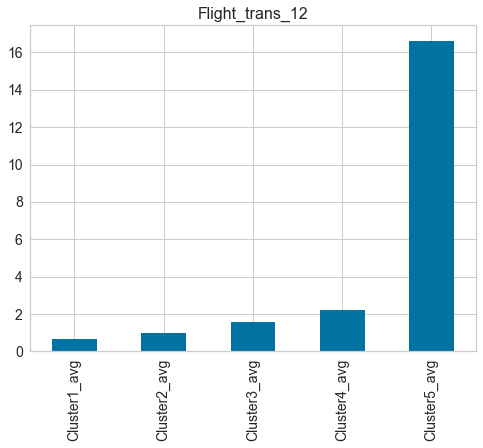

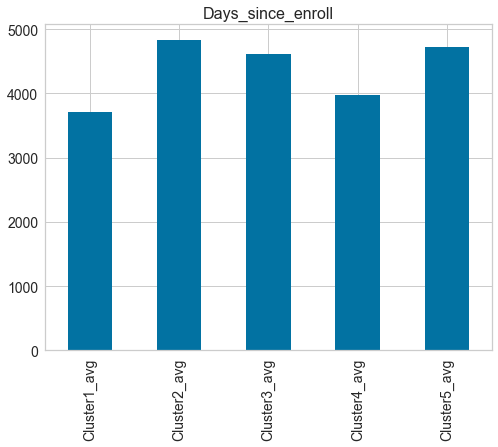

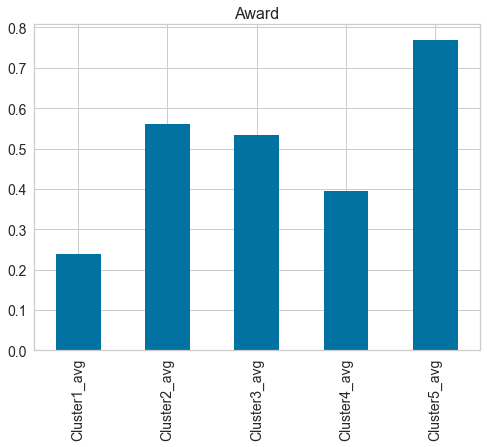

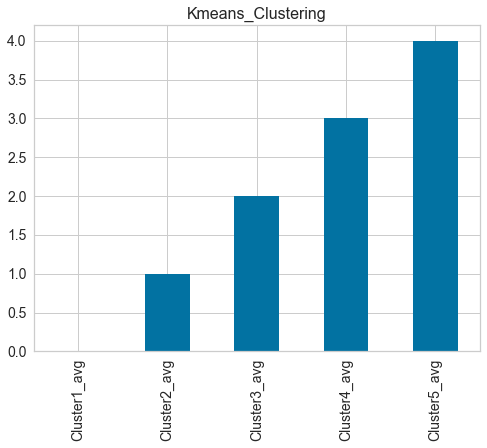

In [59]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()